# Predictive Modeling in Healthcare: Multi-Class Classification of Medical Test Results using ML Techniques

- You can Download the dataset from [**Kaggel**](https://www.kaggle.com/)
 # Link[`Healthcare`](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)
 - Here The data is a static data so the predictions might be bad and Accuracy will be low
- You can have a clear look of the data here

## It is a MUlti Class Classification Problem

- Importing the libraries

In [278]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

- Loading the data set

In [279]:
df = pd.read_csv("healthcare_dataset_new.csv")
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

- Basic INFO

In [280]:
df.shape

(55500, 15)

In [281]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [282]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

- Cleaning Dataset

- 1 Duplicates

In [284]:
df.duplicated().sum()

534

- There are total of 534 duplicate rows in data
- droping all the duplicates

In [285]:
df.drop_duplicates(inplace=True)

In [286]:
df.duplicated().sum()

0

- 2 Null Values

In [287]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

- No Null values in the data set

## Data Analysis/ Understanding
 - Checking for unique values in each column

In [288]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

- Checking the data types

In [289]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

- most of the columns are catogorical

In [290]:
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns
print(categorical_columns)
print("=*"*35)
print("=*"*35)
print(numerical_columns)

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


 - Now creating a function to get catagorical and object_type non categorical columns 
 - And numerical columns into discrete and continous columns

In [291]:
def columns(df):
    categorical=[]
    non_categorical = []
    discrete = []
    continuous = []
    for i in df.columns:
        if df[i].dtype=="object":
            if df[i].nunique() < 10:
                categorical.append(i)
            else:
                non_categorical.append(i)
        elif df[i].dtype in ("int64","float64"):
            if df[i].nunique()<10:
                discrete.append(i)
            else:
                continuous.append(i)
    return categorical,non_categorical,discrete,continuous

categorical,non_categorical,discrete,continuous = columns(df)
print("Categorical_columns are : ",categorical)
print()
print("non_categorical_columns are :",non_categorical)
print()
print("discrete_columns are :",discrete)
print()
print("continuous_columns are :",continuous)

Categorical_columns are :  ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

non_categorical_columns are : ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']

discrete_columns are : []

continuous_columns are : ['Age', 'Billing Amount', 'Room Number']


## Checking for unicque values in each categorical Columns

In [292]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Admission Type
['Urgent' 'Emergency' 'Elective']

Medication
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results
['Normal' 'Inconclusive' 'Abnormal']



In [293]:
for i in categorical:
    print(df[i].value_counts())
    print()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64



- look at all the categorical values they all are equally distributed
- the values of target variable also equally distributed by that we can say that it is **WellBalanced** data
-  So we dont have to use any SMOTE or other techniques

# Visualization

- For categorial Values

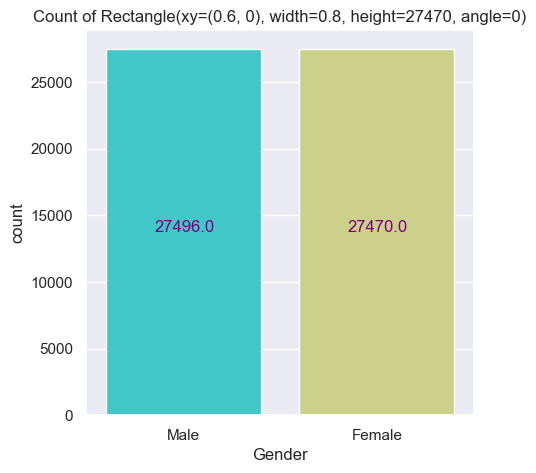

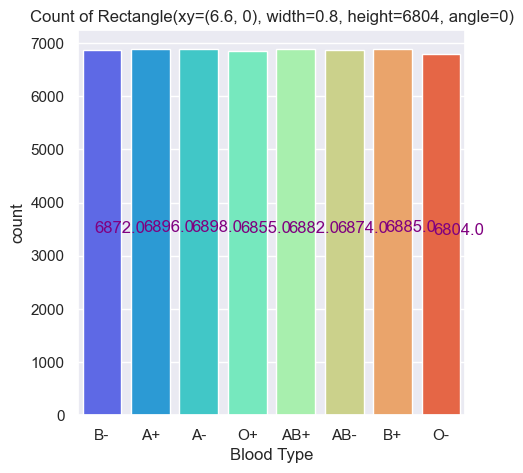

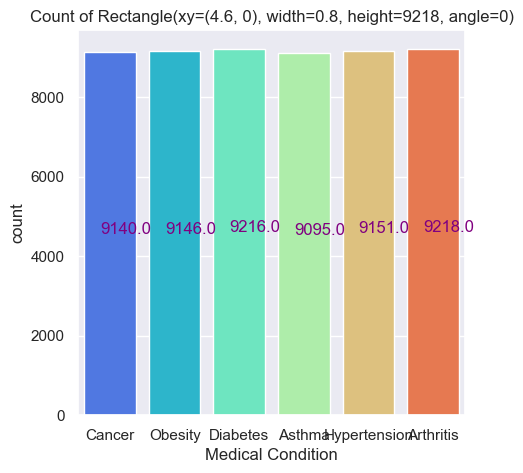

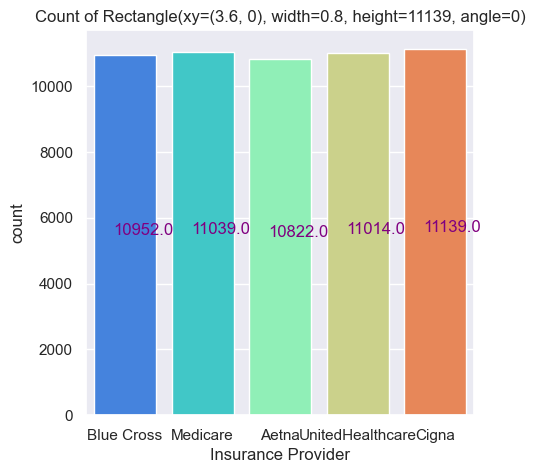

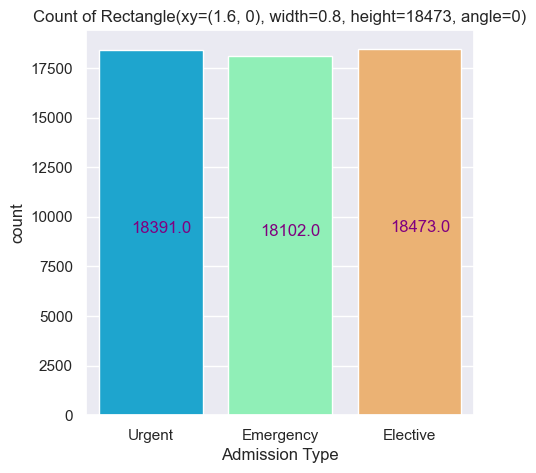

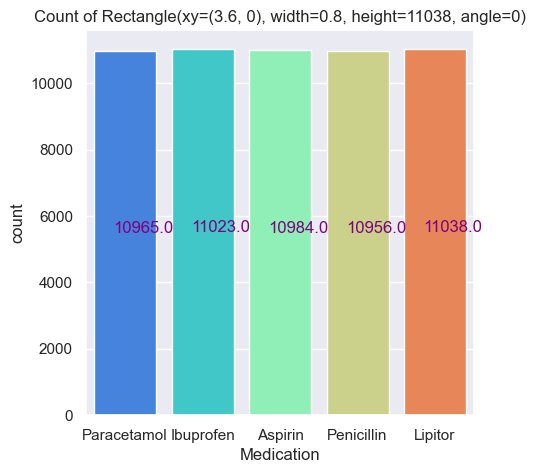

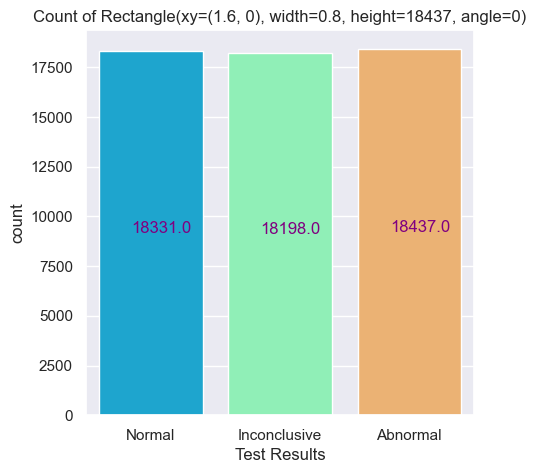

In [294]:
for i in categorical:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=i,data=df,palette="rainbow")
    for i in ax.patches:
        x = i.get_x()
        y = i.get_height()
        ax.annotate(y,(x+0.25,y/2),color="purple")
    plt.title(f"Count of {i}")
    plt.show()

- We can also generate interactive visuals using plotly

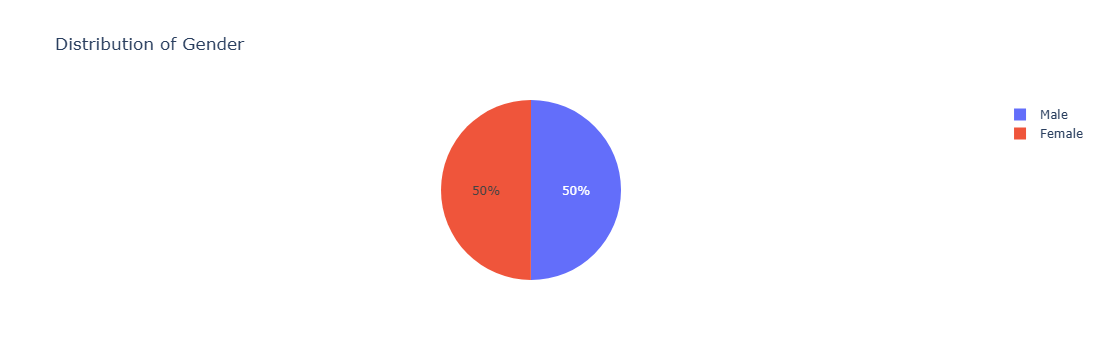

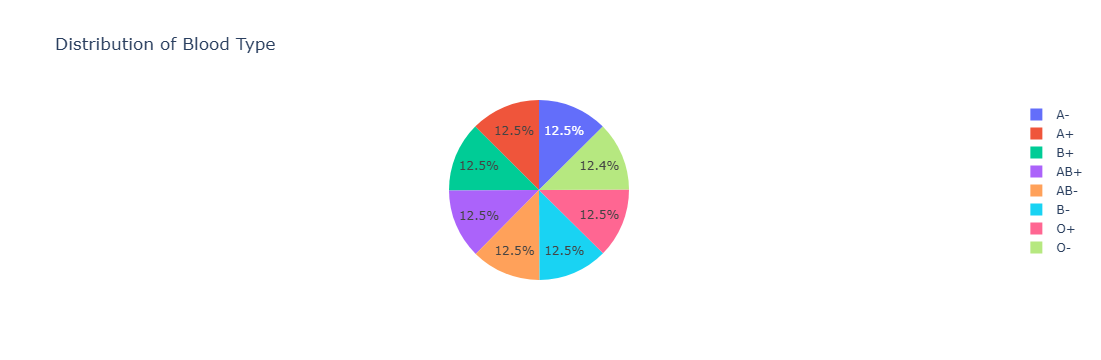

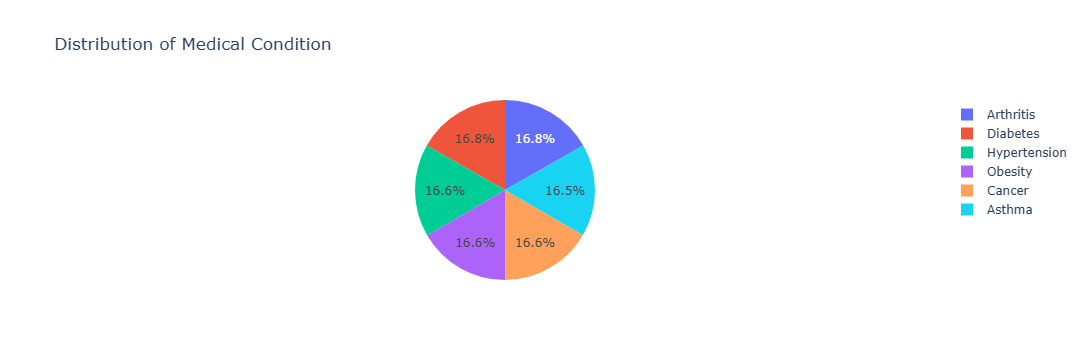

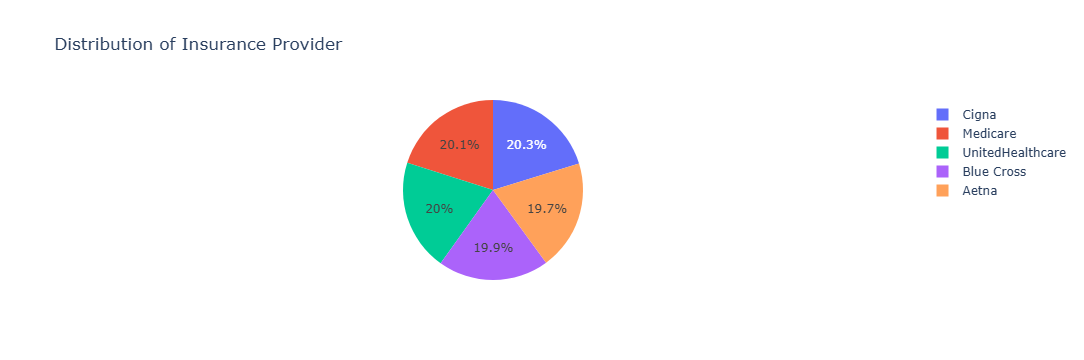

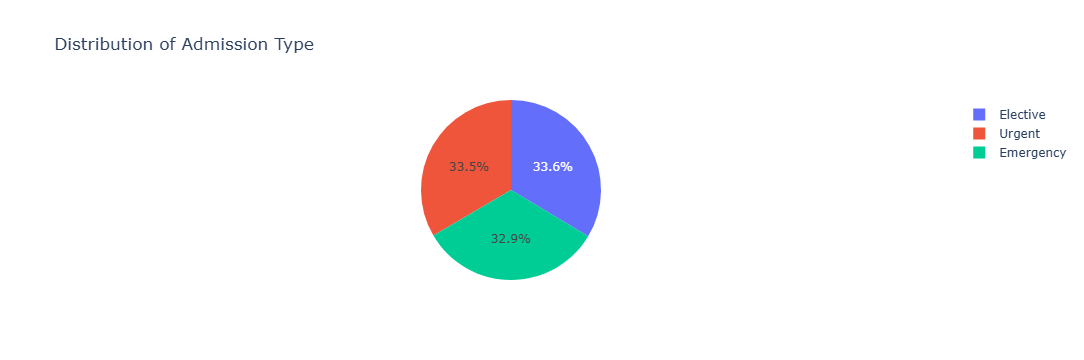

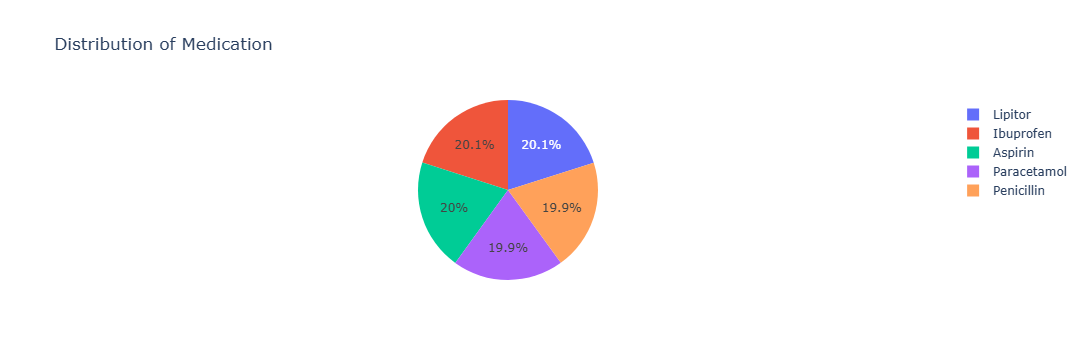

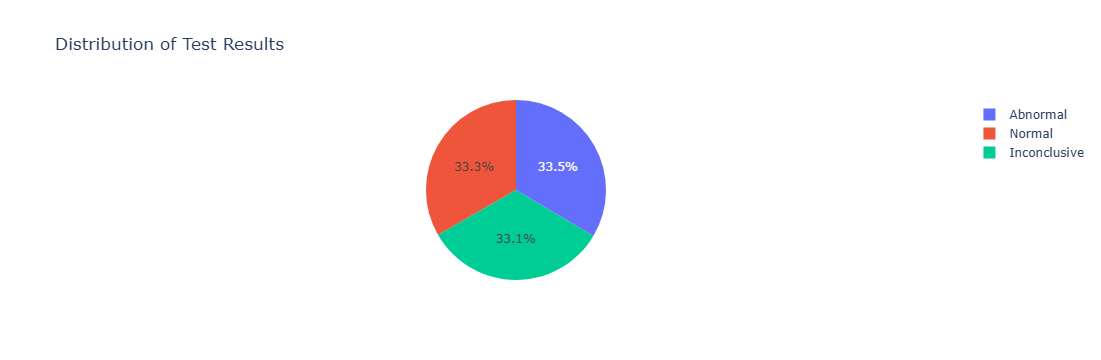

In [295]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts,values = counts.values,names=counts.index,title = f"Distribution of {i}")
    fig.show()

- Numerical Columns

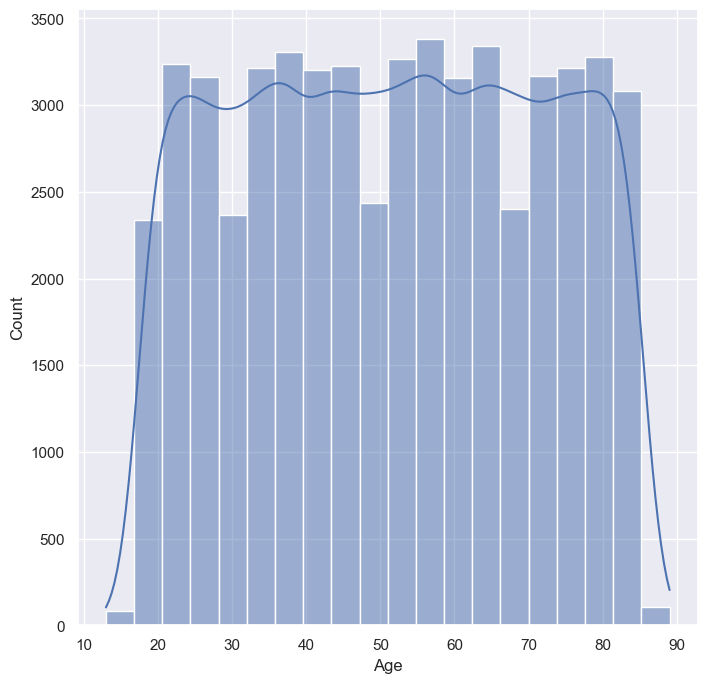

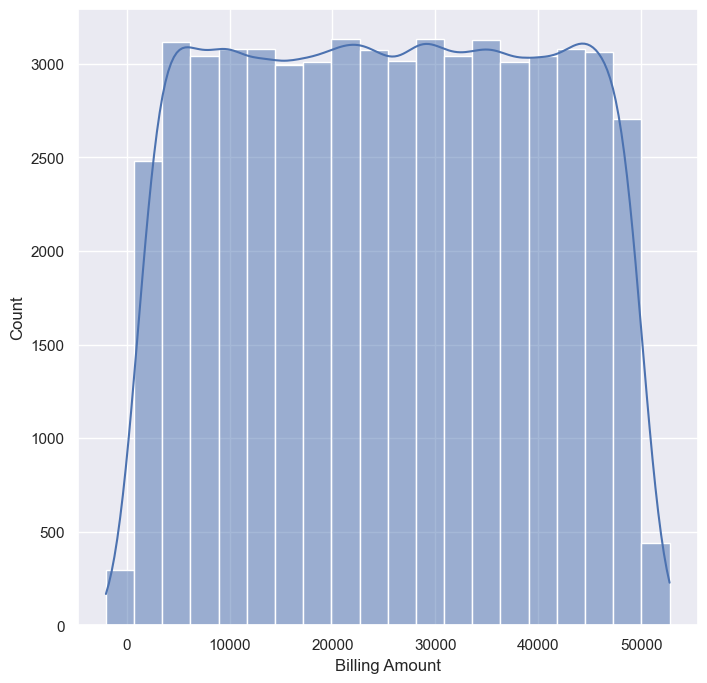

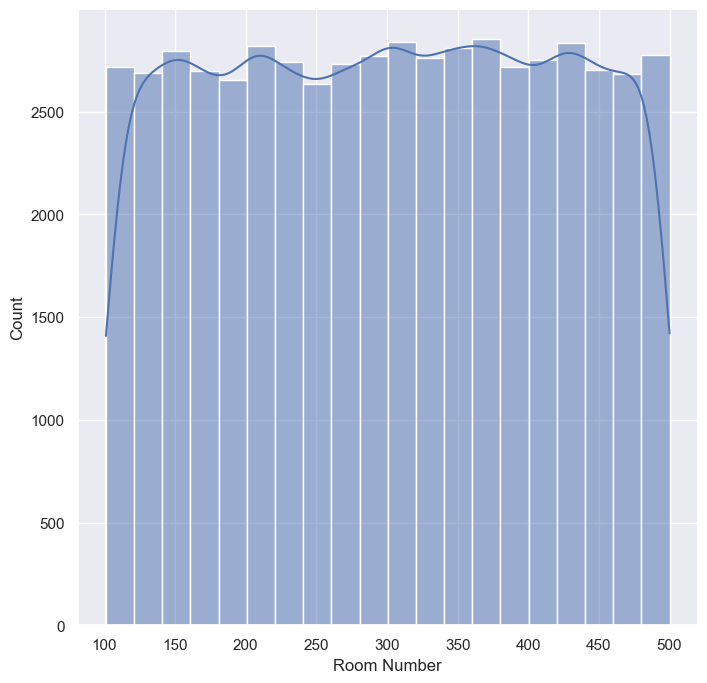

In [296]:
for i in continuous:
    plt.figure(figsize=(8,8))
    sns.histplot(df[i],bins=20,palette="rainbow",kde=True)
    plt.show()

- Checking for outliers in numerical variables

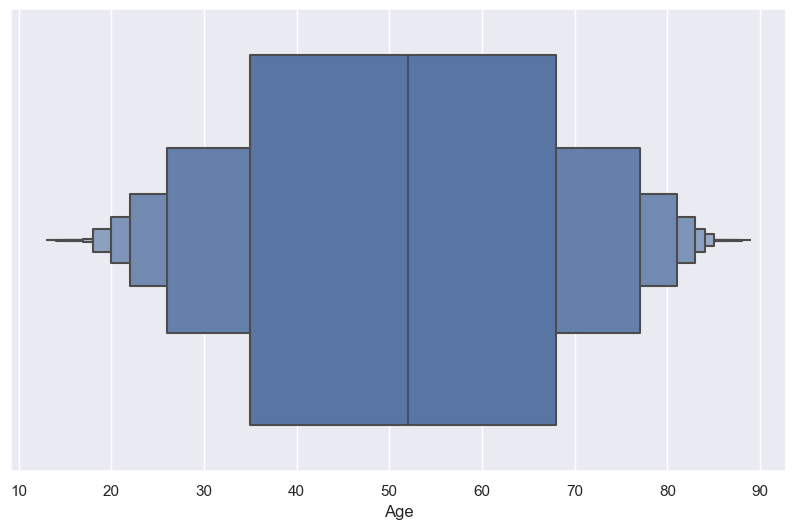

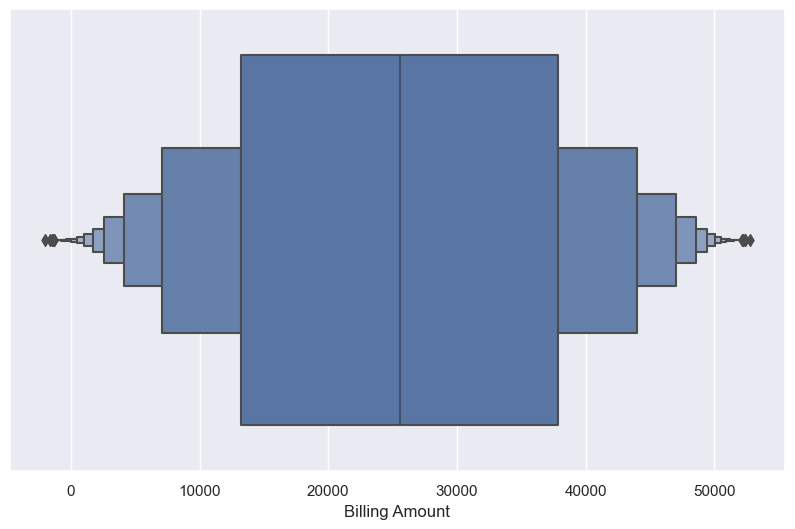

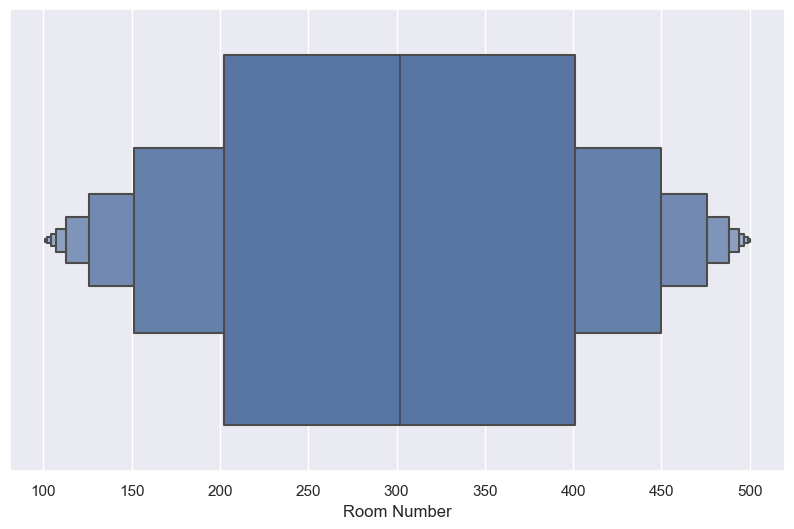

In [297]:
# for i in continuous:
#     plt.figure(figsize=(10,6))
#     sns.boxplot(df,x=i)
#     plt.show()
for i in continuous:
    plt.figure(figsize=(10,6))
    sns.boxenplot(df,x=i)
    plt.show()

- Checking the correlation between the numerical columns

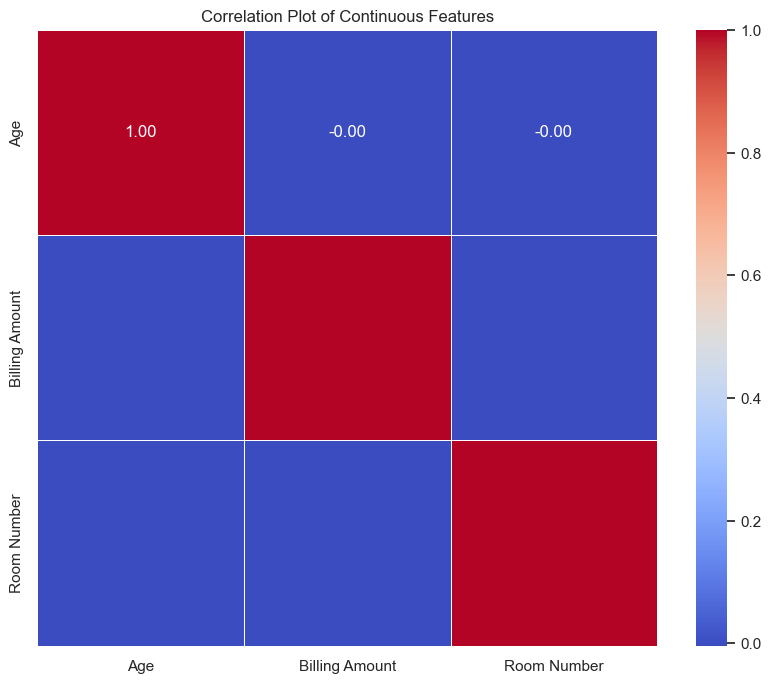

In [298]:
corr_matrix = df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Continuous Features")
plt.show()

In [299]:
corr_matrix

Age  Billing Amount  Room Number
Age             1.000000       -0.003427    -0.000352
Billing Amount -0.003427        1.000000    -0.003930
Room Number    -0.000352       -0.003930     1.000000

In [300]:
from scipy.stats import f_oneway

In [301]:
f_test,p_val = f_oneway(df[df["Gender"]=="Male"]["Billing Amount"]
                       ,df[df["Gender"]=="Female"]["Billing Amount"])
f_test,p_val

(1.3408137444079473, 0.24689554522480017)

In [302]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Admission Type'], df['Medical Condition'])
contingency_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3062    3069    3114      3031          3182     3015
Emergency               3073    2978    2988      2988          2975     3100
Urgent                  3083    3048    3038      3197          2994     3031

In [303]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

Chi-Square Test result : chi2=17.8903466905814, p-value=0.05684174826535973


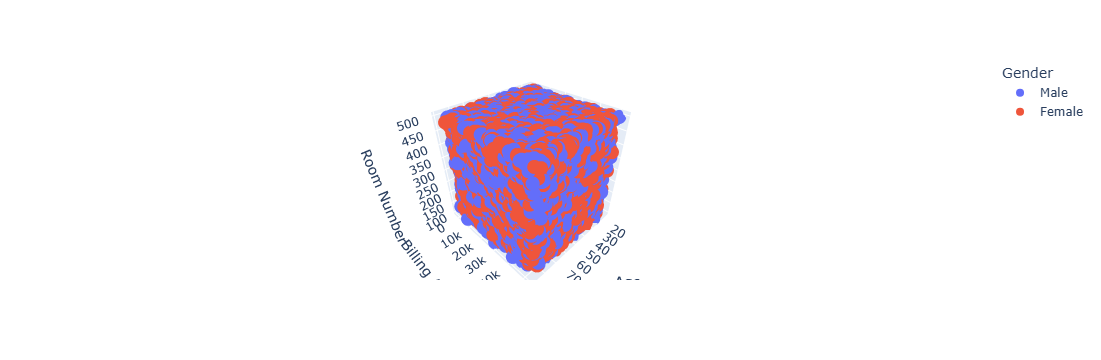

In [304]:
fig = px.scatter_3d(df, x='Age', y='Billing Amount', z='Room Number', color='Gender')
fig.show()

# Data Relaion Analysis

In [305]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [306]:
pivot_table = pd.pivot_table(df,values=["Age","Billing Amount"],
              index=["Gender","Medical Condition","Insurance Provider"],
              aggfunc={"Age":"mean",'Billing Amount':"mean"})
pivot_table

Age  Billing Amount
Gender Medical Condition Insurance Provider                           
Female Arthritis         Aetna               50.926257    25438.946763
                         Blue Cross          52.290393    25077.003757
                         Cigna               50.738672    25369.508130
                         Medicare            51.841270    25437.741299
                         UnitedHealthcare    51.274280    25360.429075
       Asthma            Aetna               51.048406    25483.600511
                         Blue Cross          52.655134    25095.983389
                         Cigna               52.274714    25435.685064
                         Medicare            50.781737    25457.418106
                         UnitedHealthcare    51.651265    25322.035256
       Cancer            Aetna               52.195175    24900.149457
                         Blue Cross          51.007675    25309.487713
                         Cigna               51.845484    26126.045696
                         Medicare            50.794279    25288.428940
                         UnitedHealthcare    50.794311    24792.092471
       Diabetes          Aetna               50.536424    25221.107133
                         Blue Cross          52.965921    25677.729155
                         Cigna               51.254444    25345.013637
                         Medicare            51.405010    25895.215276
                         UnitedHealthcare    51.806843    25626.116992
       Hypertension      Aetna               52.329241    25612.878188
                         Blue Cross          52.178378    25805.068676
                         Cigna               52.634337    25043.545238
                         Medicare            52.192140    25519.024567
                         UnitedHealthcare    51.382888    25190.625954
       Obesity           Aetna               51.509153    25489.086696
                         Blue Cross          51.555556    25888.408216
                         Cigna               51.016546    26201.868187
                         Medicare            51.519423    26393.066554
                         UnitedHealthcare    51.082965    25348.489496
Male   Arthritis         Aetna               52.070652    25507.996510
                         Blue Cross          50.813725    26520.744447
                         Cigna               52.335129    25242.557605
                         Medicare            51.455056    25178.846298
                         UnitedHealthcare    51.656522    25983.160357
       Asthma            Aetna               52.700913    26203.332239
                         Blue Cross          51.535870    25172.441960
                         Cigna               50.692142    25816.321616
                         Medicare            50.692560    26087.912256
                         UnitedHealthcare    51.903704    26246.622536
       Cancer            Aetna               51.454849    24988.066884
                         Blue Cross          52.412844    24804.055566
                         Cigna               52.227712    24980.862086
                         Medicare            51.165598    25343.610061
                         UnitedHealthcare    51.552239    24969.955380
       Diabetes          Aetna               51.981622    25870.417162
                         Blue Cross          51.205072    25980.146428
                         Cigna               50.661538    25981.737375
                         Medicare            52.402373    25520.871851
                         UnitedHealthcare    51.600229    25436.081364
       Hypertension      Aetna               51.957557    26115.934992
                         Blue Cross          50.426286    25565.339589
                         Cigna               50.897010    24604.231738
                         Medicare            52.520397    26163.426489
                         UnitedHealthcare    50.639098    25372.101709
    

In [307]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [308]:
pivot_table_sum = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Insurance Provider','Test Results'],
                            aggfunc='sum', margins=True)
pivot_table_sum

Billing Amount
Insurance Provider Test Results                
Aetna              Abnormal        9.171489e+07
                   Inconclusive    9.330576e+07
                   Normal          9.147809e+07
Blue Cross         Abnormal        9.248506e+07
                   Inconclusive    9.548302e+07
                   Normal          9.244101e+07
Cigna              Abnormal        9.562466e+07
                   Inconclusive    9.488665e+07
                   Normal          9.382279e+07
Medicare           Abnormal        9.634342e+07
                   Inconclusive    9.258157e+07
                   Normal          9.398603e+07
UnitedHealthcare   Abnormal        9.478735e+07
                   Inconclusive    9.029127e+07
                   Normal          9.483675e+07
All                                1.404068e+09

In [309]:
pivot_table_multi = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Medical Condition','Gender'],
                            aggfunc=['sum','mean','count','min','max'], margins=True)
pivot_table_multi

sum           mean          count  \
                         Billing Amount Billing Amount Billing Amount   
Medical Condition Gender                                                
Arthritis         Female   1.176154e+08   25337.234722           4642   
                  Male     1.175522e+08   25688.849297           4576   
Asthma            Female   1.143928e+08   25358.633474           4511   
                  Male     1.187435e+08   25903.913291           4584   
Cancer            Female   1.154482e+08   25284.314393           4566   
                  Male     1.144441e+08   25020.562355           4574   
Diabetes          Female   1.177971e+08   25558.060586           4609   
                  Male     1.186899e+08   25762.941147           4607   
Hypertension      Female   1.162115e+08   25434.788625           4569   
                  Male     1.171669e+08   25571.135120           4582   
Obesity           Female   1.183084e+08   25871.071549           4573   
                  Male     1.176983e+08   25737.652254           4573   
All                        1.404068e+09   25544.306284          54966   

                                    min            max  
                         Billing Amount Billing Amount  
Medical Condition Gender                                
Arthritis         Female    -964.798619    52170.03685  
                  Male     -1129.997176    51975.96814  
Asthma            Female   -1306.662189    52181.83779  
                  Male     -1520.420555    51336.22121  
Cancer            Female   -2008.492140    52373.03237  
                  Male     -1277.645337    52092.66990  
Diabetes          Female    -860.617987    52211.85297  
                  Male     -1316.618581    51848.20160  
Hypertension      Female    -652.181369    52764.27674  
                  Male     -1660.009373    52271.66375  
Obesity           Female    -967.594706    51501.64977  
                  Male     -1310.272895    52024.72644  
All                        -2008.492140    52764.27674

In [310]:
df.groupby("Admission Type")["Billing Amount"].agg([("median","median")
                                                   ,("Standard Deviation","std")])

median  Standard Deviation
Admission Type                                 
Elective        25674.73536        14220.835323
Emergency       25413.78104        14159.764673
Urgent          25543.55847        14244.202912

In [311]:
df.groupby("Insurance Provider")[["Billing Amount","Age"]].agg([("mean","mean"),
                                                                ("standard deviation","std")
                                                               ,("sum","sum")])

Billing Amount                                         Age  \
                             mean standard deviation           sum       mean   
Insurance Provider                                                              
Aetna                25549.689648       14265.963683  2.764987e+08  51.684901   
Blue Cross           25603.460603       14112.963771  2.804091e+08  51.699416   
Cigna                25525.998670       14251.451597  2.843341e+08  51.427687   
Medicare             25628.320208       14138.635402  2.829110e+08  51.395144   
UnitedHealthcare     25414.506208       14273.950885  2.799154e+08  51.473851   

                                               
                   standard deviation     sum  
Insurance Provider                             
Aetna                       19.565201  559334  
Blue Cross                  19.660446  566212  
Cigna                       19.711755  572853  
Medicare                    19.473465  567351  
UnitedHealthcare            19.616698  566933

<Axes: xlabel='Medical Condition'>

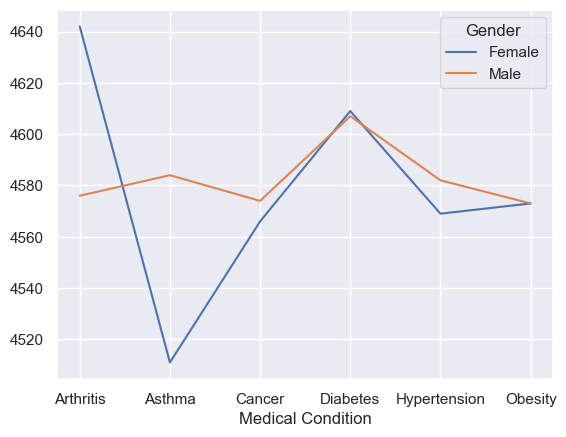

In [312]:
pd.crosstab(df["Medical Condition"],df["Gender"]).plot()

<Axes: xlabel='Medication'>

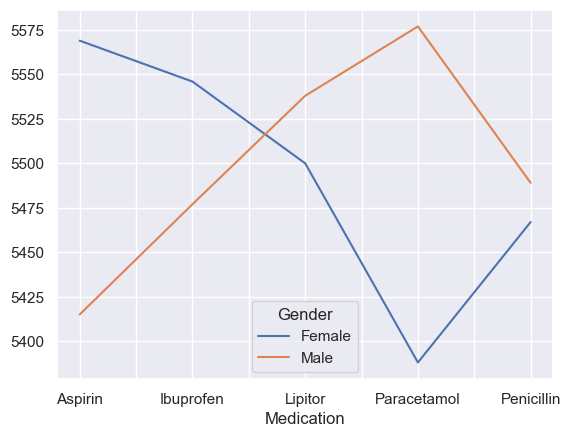

In [313]:
pd.crosstab(df["Medication"],df["Gender"]).plot()

<Axes: xlabel='Medication'>

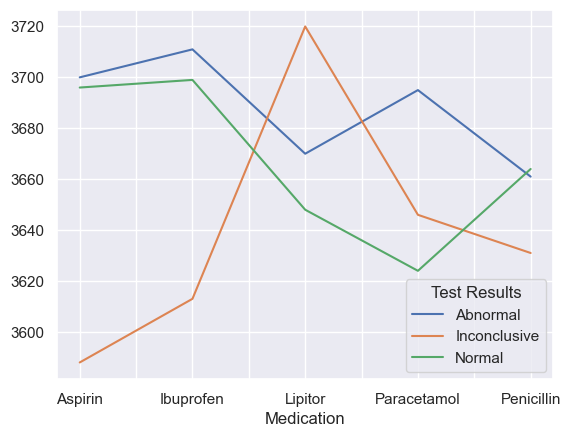

In [314]:
pd.crosstab(df["Medication"],df["Test Results"]).plot()

- working with date columns

In [315]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [316]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"],errors="ignore",format="%d-%m-%Y")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"],format="%d-%m-%Y")

In [317]:
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

- Splittind it into day,month,year columns

In [318]:
df["admission Day"] = df["Date of Admission"].dt.day
df["admission month"] = df["Date of Admission"].dt.month
df["admission year"] = df["Date of Admission"].dt.year
df["Dischrage Day"] = df["Discharge Date"].dt.day
df["Dischrage month"] = df["Discharge Date"].dt.month
df["Dischrage year"] = df["Discharge Date"].dt.year
df["Days"] = df['Discharge Date']-df['Date of Admission']

# Droping the date of admission and dischrage columns
df.drop(["Date of Admission","Discharge Date"],axis=1,inplace=True)

In [322]:
df.head().T

0                1                 2  \
Name                  Bobby JacksOn     LesLie TErRy       DaNnY sMitH   
Age                              30               62                76   
Gender                         Male             Male            Female   
Blood Type                       B-               A+                A-   
Medical Condition            Cancer          Obesity           Obesity   
Doctor                Matthew Smith  Samantha Davies  Tiffany Mitchell   
Hospital            Sons and Miller          Kim Inc          Cook PLC   
Insurance Provider       Blue Cross         Medicare             Aetna   
Billing Amount          18856.28131      33643.32729       27955.09608   
Room Number                     328              265               205   
Admission Type               Urgent        Emergency         Emergency   
Medication              Paracetamol        Ibuprofen           Aspirin   
Test Results                 Normal     Inconclusive            Normal   
admission Day                    31               20                22   
admission month                   1                8                 9   
admission year                 2024             2019              2022   
Dischrage Day                     2               26                 7   
Dischrage month                   2                8                10   
Dischrage year                 2024             2019              2022   
Days                2 days 00:00:00  6 days 00:00:00  15 days 00:00:00   

                                             3                 4  
Name                              andrEw waTtS     adrIENNE bEll  
Age                                         28                43  
Gender                                  Female            Female  
Blood Type                                  O+               AB+  
Medical Condition                     Diabetes            Cancer  
Doctor                             Kevin Wells    Kathleen Hanna  
Hospital            Hernandez Rogers and Vang,       White-White  
Insurance Provider                    Medicare             Aetna  
Billing Amount                     37909.78241       14238.31781  
Room Number                                450               458  
Admission Type                        Elective            Urgent  
Medication                           Ibuprofen        Penicillin  
Test Results                          Abnormal          Abnormal  
admission Day                               18                19  
admission month                             11                 9  
admission year                            2020              2022  
Dischrage Day                               18                 9  
Dischrage month                             12                10  
Dischrage year                            2020              2022  
Days                          30 days 00:00:00  20 days 00:00:00

- Extracting only number from the days columns

In [328]:
df["Days"]=df['Days'].astype("str").str.split().str[0].astype(int)

In [329]:
df.head(1)

Name  Age Gender Blood Type Medical Condition         Doctor  \
0  Bobby JacksOn   30   Male         B-            Cancer  Matthew Smith   

          Hospital Insurance Provider  Billing Amount  Room Number  \
0  Sons and Miller         Blue Cross     18856.28131          328   

  Admission Type   Medication Test Results  admission Day  admission month  \
0         Urgent  Paracetamol       Normal             31                1   

   admission year  Dischrage Day  Dischrage month  Dischrage year  Days  
0            2024              2                2            2024     2

- Removing the unnecessary columns from the dataframe

In [330]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'admission Day',
       'admission month', 'admission year', 'Dischrage Day', 'Dischrage month',
       'Dischrage year', 'Days'],
      dtype='object')

- these are the columns which are not required and dosenot show any affect on Test Result

In [331]:
not_required = ['Name', 'Doctor','Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number','admission Day',
       'admission month', 'admission year', 'Dischrage Day', 'Dischrage month',
       'Dischrage year']
df.drop(not_required,axis=1,inplace=True)
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results  Days  
0        Normal     2  
1  Inconclusive     6  
2        Normal    15  
3      Abnormal    30  
4      Abnormal    20

In [332]:
categorical,non_categorical,discrete,continuous = columns(df)
print("Categorical_columns are : ",categorical)
print()
print("non_categorical_columns are :",non_categorical)
print()
print("discrete_columns are :",discrete)
print()
print("continuous_columns are :",continuous)

Categorical_columns are :  ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']

non_categorical_columns are : []

discrete_columns are : []

continuous_columns are : ['Age']


- Now encoding all the categorical columns

In [333]:
categorical_independent = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']
encoded_columns = pd.get_dummies(df[categorical_independent],drop_first=True,dtype="int64")
encoded_columns

Gender_Male  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0                1              0               0               0   
1                1              0               0               0   
2                0              1               0               0   
3                0              0               0               0   
4                0              0               1               0   
...            ...            ...             ...             ...   
55495            0              0               0               0   
55496            0              0               0               1   
55497            0              0               0               0   
55498            1              0               0               0   
55499            0              0               0               0   

       Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0                  0              1              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              1              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
55495              0              0              1              0   
55496              0              0              0              0   
55497              1              0              0              0   
55498              0              0              0              1   
55499              0              0              1              0   

       Medical Condition_Asthma  Medical Condition_Cancer  \
0                             0                         1   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         1   
...                         ...                       ...   
55495                         1                         0   
55496                         0                         0   
55497                         0                         0   
55498                         0                         0   
55499                         0                         0   

       Medical Condition_Diabetes  Medical Condition_Hypertension  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   
...                           ...                             ...   
55495                           0                               0   
55496                           0                               0   
55497                           0                               1   
55498                           0                               0   
55499                           0                               0   

       Medical Condition_Obesity  Admission Type_Emergency  \
0                              0                         0   
1                              1                         1   
2                              1                         1   
3                              0                         0   
4                              0                         0   
...                          ...                       ...   
55495                          0                         0   
55496                          1                         0   
55497                          0                         0   
55498                          0                         0   
55499                          0                         0   

       Admission Type_Urgent  Medication_I

In [334]:
df1 = pd.concat([df.drop(categorical_independent,axis=1),encoded_columns],axis=1)
df1.head()

Age  Test Results  Days  Gender_Male  Blood Type_A-  Blood Type_AB+  \
0   30        Normal     2            1              0               0   
1   62  Inconclusive     6            1              0               0   
2   76        Normal    15            0              1               0   
3   28      Abnormal    30            0              0               0   
4   43      Abnormal    20            0              0               1   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  ...  \
0               0              0              1              0  ...   
1               0              0              0              0  ...   
2               0              0              0              0  ...   
3               0              0              0              1  ...   
4               0              0              0              0  ...   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         1                           0   
1                         0                           0   
2                         0                           0   
3                         0                           1   
4                         1                           0   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                               0                          0   
1                               0                          1   
2                               0                          1   
3                               0                          0   
4                               0                          0   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   
2                         1                      0                     0   
3                         0                      0                     1   
4                         0                      1                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  
0                   0                       1                      0  
1                   0                       0                      0  
2                   0                       0                      0  
3                   0                       0                      0  
4                   0                       0                      1  

[5 rows x 22 columns]

In [335]:
df1.columns

Index(['Age', 'Test Results', 'Days', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')

In [336]:
df1["Test Results"].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [337]:
maping = {'Normal':0,'Inconclusive':2,'Abnormal':1}
df1["Test Results"] = df["Test Results"].replace(maping)
df1.head()

Age  Test Results  Days  Gender_Male  Blood Type_A-  Blood Type_AB+  \
0   30             0     2            1              0               0   
1   62             2     6            1              0               0   
2   76             0    15            0              1               0   
3   28             1    30            0              0               0   
4   43             1    20            0              0               1   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  ...  \
0               0              0              1              0  ...   
1               0              0              0              0  ...   
2               0              0              0              0  ...   
3               0              0              0              1  ...   
4               0              0              0              0  ...   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         1                           0   
1                         0                           0   
2                         0                           0   
3                         0                           1   
4                         1                           0   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                               0                          0   
1                               0                          1   
2                               0                          1   
3                               0                          0   
4                               0                          0   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                         0                      1                     0   
1                         1                      0                     1   
2                         1                      0                     0   
3                         0                      0                     1   
4                         0                      1                     0   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  
0                   0                       1                      0  
1                   0                       0                      0  
2                   0                       0                      0  
3                   0                       0                      0  
4                   0                       0                      1  

[5 rows x 22 columns]

In [338]:
df1["Age"].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

In [339]:
df1["Days"].describe()

count    54966.000000
mean        15.499290
std          8.661471
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Days, dtype: float64

-As the data is not highly varied between features, in some cases where the data columns are already in a similar range and not highly distributed, scaling might not have a significant impact

## Splitting the data

In [341]:
x = df1.drop("Test Results",axis=1)
y = df1['Test Results']

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic Regression Model

In [345]:
from sklearn.linear_model import LogisticRegression
Log_model = LogisticRegression()

In [346]:
Log_model.fit(xtrain,ytrain)

LogisticRegression()

In [347]:
ypred = Log_model.predict(xtest)

- Evaluation Metrics

In [348]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [349]:
print(accuracy_score(ytest,ypred))

0.3350009095870475


- As the data is static the acurracy will be very low

In [350]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.34      0.32      0.33      3696
           1       0.33      0.47      0.39      3616
           2       0.34      0.21      0.26      3682

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.33     10994
weighted avg       0.34      0.34      0.33     10994



In [351]:
conf = confusion_matrix(ytest,ypred)
conf

array([[1196, 1731,  769],
       [1134, 1703,  779],
       [1199, 1699,  784]], dtype=int64)

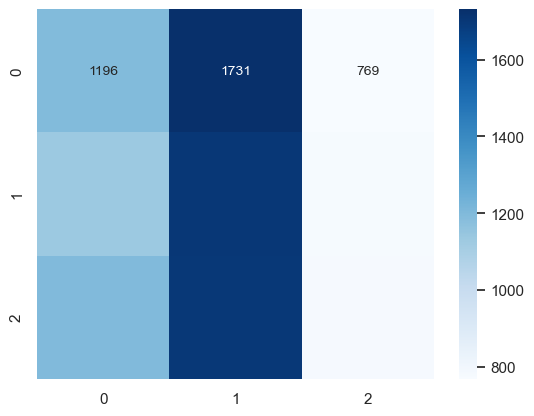

In [370]:

ax = sns.heatmap(conf,annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(ytest), yticklabels=np.unique(ytest),annot_kws={"size": 10})
plt.show()

# Decision tree Classifier

In [371]:
from sklearn.tree import DecisionTreeClassifier

In [372]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)
ypred=dt_model.predict(xtest)

0.3611060578497362


              precision    recall  f1-score   support

           0       0.36      0.37      0.37      3696
           1       0.36      0.36      0.36      3616
           2       0.36      0.35      0.36      3682

    accuracy                           0.36     10994
   macro avg       0.36      0.36      0.36     10994
weighted avg       0.36      0.36      0.36     10994



[[1367 1175 1154]
 [1197 1308 1111]
 [1188 1199 1295]]




<Axes: >

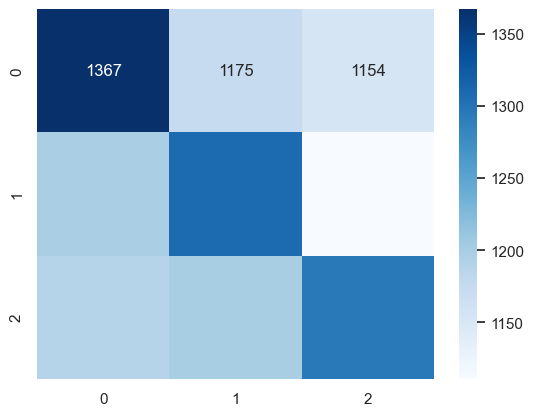

In [374]:
print(accuracy_score(ytest,ypred))
print()
print()
print(classification_report(ytest,ypred))
print()
print()
print(confusion_matrix(ytest,ypred))
print()
print()
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cmap="Blues")

# Random Forest Classifier

In [375]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain,ytrain)
ypred=rf_model.predict(xtest)

0.3983991267964344


              precision    recall  f1-score   support

           0       0.40      0.40      0.40      3696
           1       0.39      0.41      0.40      3616
           2       0.41      0.39      0.40      3682

    accuracy                           0.40     10994
   macro avg       0.40      0.40      0.40     10994
weighted avg       0.40      0.40      0.40     10994



[[1465 1207 1024]
 [1077 1479 1060]
 [1147 1099 1436]]




<Axes: >

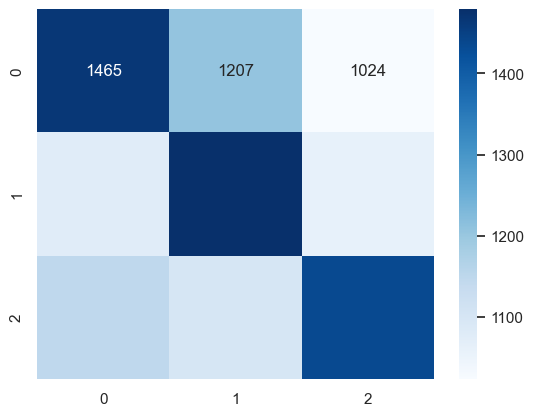

In [376]:
print(accuracy_score(ytest,ypred))
print()
print()
print(classification_report(ytest,ypred))
print()
print()
print(confusion_matrix(ytest,ypred))
print()
print()
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cmap="Blues")

# XGBClassifier

In [377]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(xtrain,ytrain)
ypred = xg_model.predict(xtest)

0.338093505548481


              precision    recall  f1-score   support

           0       0.34      0.32      0.33      3696
           1       0.33      0.36      0.35      3616
           2       0.35      0.33      0.34      3682

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.34     10994
weighted avg       0.34      0.34      0.34     10994



[[1193 1314 1189]
 [1197 1308 1111]
 [1150 1316 1216]]




<Axes: >

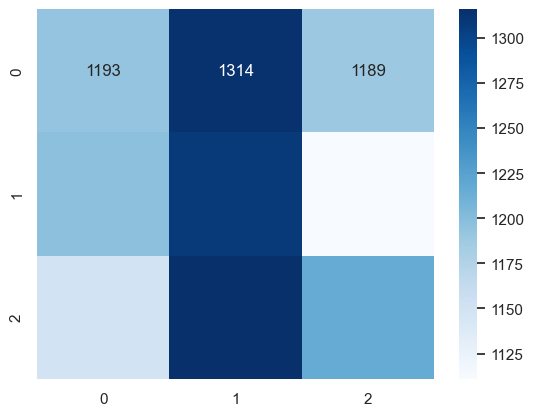

In [378]:
print(accuracy_score(ytest,ypred))
print()
print()
print(classification_report(ytest,ypred))
print()
print()
print(confusion_matrix(ytest,ypred))
print()
print()
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d',cmap="Blues")

- Saving the model as a pickel for deployment

In [395]:
import pickle
with open("logistic_regression_model_health.pkl", 'wb') as file:
    pickle.dump(Log_model, file)